# More Futures

### BUSI 722: Data-Driven Finance II
### Kerry Back, Rice University

### Some cash-settled contracts

- [S&P 500](https://www.cmegroup.com/markets/equities/sp/e-mini-sandp500.contractSpecs.html)
- [Fed Funds](https://www.cmegroup.com/markets/interest-rates/stirs/30-day-federal-fund.contractSpecs.html)
- [Crack Spread](https://www.cmegroup.com/markets/energy/refined-products/rbob-crack-spread-swap-futures.contractSpecs.html)

## Slopes of Forward Curves

- Forward curve (or futures curve) = futures price as a function of maturity
- Sometimes upward sloping (prices are higher at later maturities)
- Sometimes downward sloping (prices are lower at later maturities)
- Why?
- [Histories of forward curves](https://learn-investments.rice-business.org/futures-options/forward-curve)

### Gold futures

- Can create "synthetic" gold futures:
  - borrow money, buy gold spot and store it
  - later pay today's spot price + interest and have gold
- Futures price should equal today's spot price + interest
  - Anyone can create synthetic futures and sell actual futures if synthetic futures is cheaper
  - People storing gold can "sell" synthetic futures and buy actual if synthetic is more expensive
- [Gold futures prices](https://www.cmegroup.com/markets/metals/precious/gold.quotes.html#venue=globex)

### Cost of carry and convenience yield

- Cost of carry = cost of owning physical = foregone interest + storage costs
- Convenience yield = benefit of owning physical = dividends and/or profits from temporary product shortages

### Contango and backwardation

- Contango = upward sloping forward curve (futures > spot)
- Cost of carry > convenience yield $\Rightarrow$ contango (like gold)
- Backwardation = downward sloping (spot > futures)
- Convenience yield > cost of carry $\Rightarrow$ backwardation (like peso)

### Currencies

- Cost of carry for currency = U.S. interest rate
- Convenience yield for currency = foreign interest rate
- Foreign rate > U.S. rate $\Rightarrow$ backwardation.  See [peso futures](https://www.cmegroup.com/markets/fx/emerging-market/mexican-peso.html#venue=globex).
- Foreign rate < U.S. rate $\Rightarrow$ contango.  See [euro futures](https://www.cmegroup.com/markets/fx/g10/euro-fx.quotes.html#venue=globex).

### Financials

- Cost of carry for financials = U.S. interest rate
- Convenience yield = dividends (for stock index futures), coupons (for T-bond futures), ...
- Dividends/coupons > interest rates $\Rightarrow$ backwardation
- Dividends/coupons < interest rates $\Rightarrow$ contango
- [S&P 500 futures prices](https://www.cmegroup.com/markets/equities/sp/e-mini-sandp500.quotes.html#venue=globex)

### Commodities (agriculture, energy)

- Commodities can have high cost of carry (storage) and sometimes high convenience yields
- Sometimes in contango and sometimes in backwardation
- Seasonal commodities can be in neither (cyclical)
  - [Natural gas](https://www.cmegroup.com/markets/energy/natural-gas/natural-gas.quotes.html#venue=globex) prices high in winters
  - Gasoline prices high in summers
  - Agricultural high before harvest and low after harvest

## Futures roll and expectations hypothesis

### Futures roll

- Think of the forward curve as in terms of time to maturity
  - Futures price for 1 month to maturity, 2 months, ...
- Suppose you buy a futures that is in contango, and the forward curve never changes.  Do you make or lose money?
- Maybe sell contango futures and buy backwardation futures?

### Illustration

- Contract that is 12 months out
- Follow the price of the contract as time passes
- If the forward curve doesn't change, the futures price will 
  - fall in a contango market and 
  - rise in a backwardation market

In [14]:
import plotly.express as px
import pandas as pd
import numpy as np

x = np.arange(0, 24.25, 0.25)

df = None 
for i in range(49):
    y = 40 + 10 * (np.log(1 + x) - np.log(12))
    month = (i/4)*np.ones(len(x))
    size = np.ones(len(x))
    size[48-i] = 10
    d = pd.DataFrame(dict(x=x, y=y, month=month, size=size))
    df = pd.concat((df, d))
fig = px.scatter(df, x="x", y="y", animation_frame="month", size="size")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 75
fig.update_layout(
    font_size=14,
    yaxis=dict(
        range=(0, 80),
        title="Futures Price",
        title_font_size=16,
    ),
    xaxis=dict(
        title="Months to Maturity",
        title_font_size=16,
        tickvals=np.arange(0, 26, 2)
    ),
    template="plotly_dark"
)
fig.write_html("images/contango_roll.html")


In [15]:
df = None 
for i in range(49):
    y = 40 - 10 * (np.log(1 + x) - np.log(12))
    month = (i/4)*np.ones(len(x))
    size = np.ones(len(x))
    size[48-i] = 10
    d = pd.DataFrame(dict(x=x, y=y, month=month, size=size))
    df = pd.concat((df, d))
fig = px.scatter(df, x="x", y="y", animation_frame="month", size="size")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 75
fig.update_layout(
    font_size=14,
    yaxis=dict(
        range=(0, 80),
        title="Futures Price",
        title_font_size=16,
    ),
    xaxis=dict(
        title="Months to Maturity",
        title_font_size=16,
        tickvals=np.arange(0, 26, 2)
    ),
    template="plotly_dark"
)
fig.write_html("images/backwardation_roll.html")

[Futures roll in a contango market](images/contango_roll.html)

[Futures roll in a backwardation market](images/backwardation_roll.html)

But maybe the forward curve tends to rise over time in contango markets and fall over time in backwardation markets?

### Expectations hypothesis

- Today's futures price should be related to the spot price people expect the asset to trade at in the future.
  - Example: suppose we can buy December corn now at 5.00 per bushel
  - If we expect corn to sell for 4.00 per bushel in December, then maybe we should all be selling 5.00 corn now.  Spot-futures convergence implies 1.00 profit if corn is 4.00 in December.
  - If there are no expected profits of this sort, then we must expect corn to sell for 5.00 in December.
- The expectations hypothesis is that the futures price represents today's expectation of the future spot price.

In [16]:
df = None 
for i in range(49):
    y = 40 + 10 * (np.log(1 + i/4 + x) - np.log(12))
    month = (i/4)*np.ones(len(x))
    size = np.ones(len(x))
    size[48-i] = 10
    d = pd.DataFrame(dict(x=x, y=y, month=month, size=size))
    df = pd.concat((df, d))
fig = px.scatter(df, x="x", y="y", animation_frame="month", size="size")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 75
fig.update_layout(
    font_size=14,
    yaxis=dict(
        range=(0, 80),
        title="Futures Price",
        title_font_size=16,
    ),
    xaxis=dict(
        title="Months to Maturity",
        title_font_size=16,
        tickvals=np.arange(0, 26, 2)
    ),
    template="plotly_dark"
)
fig.write_html("images/contango_expectations.html")

In [17]:
df = None 
for i in range(49):
    y = 40 - 10 * (np.log(1 + i/4 + x) - np.log(12))
    month = (i/4)*np.ones(len(x))
    size = np.ones(len(x))
    size[48-i] = 10
    d = pd.DataFrame(dict(x=x, y=y, month=month, size=size))
    df = pd.concat((df, d))
fig = px.scatter(df, x="x", y="y", animation_frame="month", size="size")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 75
fig.update_layout(
    font_size=14,
    yaxis=dict(
        range=(0, 80),
        title="Futures Price",
        title_font_size=16,
    ),
    xaxis=dict(
        title="Months to Maturity",
        title_font_size=16,
        tickvals=np.arange(0, 26, 2)
    ),
    template="plotly_dark"
)
fig.write_html("images/backwardation_expectations.html")

[Expectations hypothesis in a contango market](images/contango_expectations.html)

[Expectations hypothesis in a backwardation market](images/backwardation_expectations.html)

- But there could be risk premia.
- Example: more corn hedging by farmers than by grain processors
  - Speculators are needed to buy corn futures from farmers
  - Expect compensation for risk
  - Implies futures price < expected future spot

### Currencies

- The data indicate that selling contango currency futures and buying backwardation currency futures is profitable on average.
  - Long futures $\sim$ long synthetic futures = borrowing dollars and buying currency
  - Short futures $\sim$ short synthetic futures = borrowing foreign currency and buying dollars
- Selling contango futures means selling (borrowing) high interest rate or low interest rate currencies?
- Buying backwardation means buying (investing in) high interest rate or low interest rate currencies?

## Futures-based ETFs

- You can buy or sell futures through a stock broker by buying ETFs.
- Example: USO holds oil futures
- To set up a 100 million dollar ETF:
  - Raise 100 million cash.  
  - Buy (or sell) enough futures contracts so that #contracts $\times$ futures price = 100 million
  - Deposit 10 million as T-bills for margin
  - Buy other higher yielding liquid safe assets with other 90 million
  - Gain/loss each day = 100 million x (% change in futures price + interest).

In [18]:
import pandas as pd
from pandas_datareader import DataReader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

spot = pdr("DCOILWTICO", "fred", start=1990)
uso = yf.download("USO", start=1970, progress=False)["Adj Close"]
spot = spot.reindex(uso.index)

### Spot (front month futures) price of oil

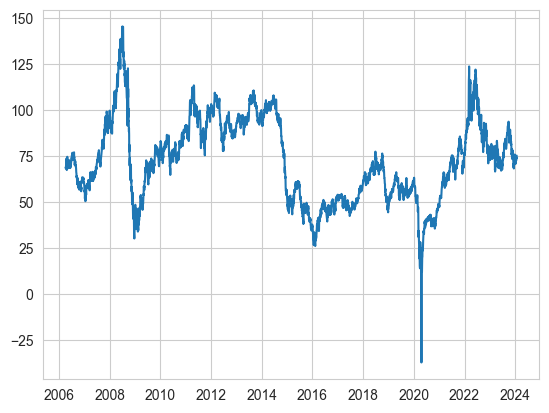

In [19]:
plt.plot(spot)
plt.show()

### Comparing oil prices to USO returns

- Calculate what 1 dollar of oil in 2006 is worth now 
- Calculate what 1 dollar in USO in 2006 would have grown to

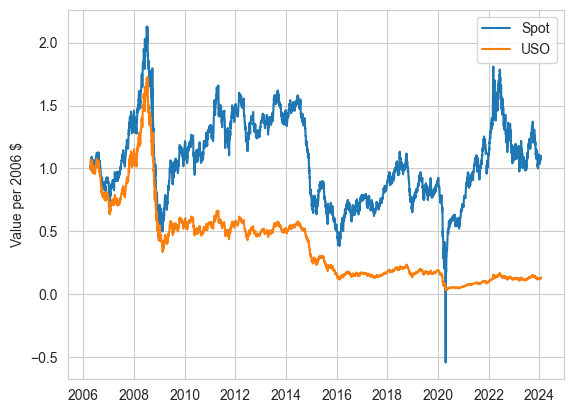

In [20]:
spot = spot/spot.iloc[0]
uso = uso/uso.iloc[0]
plt.plot(spot, label="Spot")
plt.plot(uso, label="USO")
plt.ylabel("Value per 2006 $")
plt.legend()
plt.show()









# Futures returns vs spot prices

## Spot price of crude from EIA

. . .

```{python}
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf
import numpy as np
```


```{python}
df = pd.read_excel(
    "files/PET_PRI_SPT_S1_D.xls", 
    sheet_name="Data 1",
    skiprows=9,
    header=None,
    parse_dates=[0])
df.columns=['date', 'wti', 'brent']
```

```{python}
trace = go.Scatter(
  x=df.date,
  y=df.wti,
  mode="lines",
  hovertemplate="%{x}<br>$%{y:.2f}"
)
fig = go.Figure(trace)

fig.update_yaxes(tickformat=".2f", title = "Spot WTI", tickprefix="$")
fig.update_xaxes(title="Date")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18, width=1000)
fig.show()
```

## USO

- crude oil ETF
- holds futures contracts
- [Yahoo Finance](https://finance.yahoo.com/quote/USO/holdings?p=USO)

## History of USO

. . .

```{python}
uso = yf.download("USO", start="1970-01-01", progress=False).reset_index()
uso.Date = pd.to_datetime(uso.Date)
```

```{python}
trace = go.Scatter(
  x=uso.Date,
  y=uso.Close,
  hovertemplate="%{x}<br>$%{y:.2f}"
)
fig = go.Figure(trace)

fig.update_yaxes(tickformat=".2f", title="USO", tickprefix="$")
fig.update_xaxes(title="Date")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18, width=1000)
fig.show()
```

## Normalized histories 

. . .

```{python}
uso.Date = [x.strftime("%Y-%m-%d") for x in uso.Date]
df.date = df.date.astype(str)

df = df.merge(uso, left_on="date", right_on="Date")
df["spot"] = df.wti / df.wti.iloc[0]
df["uso"] = df.Close / df.Close.iloc[0]
```

```{python}
trace1 = go.Scatter(
  x=df.date,
  y=df.spot,
  name="Spot",
  hovertemplate='$%{y:.2f}<extra></extra>'
)
trace2 = go.Scatter(
  x=df.date,
  y=df.uso,
  name="USO",
  hovertemplate='$%{y:.2f}<extra></extra>'
)
fig = go.Figure()
for trace in [trace1, trace2]:
  fig.add_trace(trace)
fig.update_yaxes(tickformat=".2f", title="Values Starting from $1", tickprefix="$")
fig.update_xaxes(title="Date")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18)
fig.update_layout(hovermode="x unified", width=1000)
fig.show()
```

## Forward Curves


```{python}
df = pd.read_csv("files/crude_futures_monthly.csv")
df = df[(df.date>="2006-03-01")&(df.days<=365)]
df = df.sort_values(by=["date", "days"])
import plotly.express as px
fig = px.line(
  df,
  x="days",
  y="settle",
  animation_frame="date",
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200
fig.update_yaxes(range=[0.99*df.settle.min(), 1.01*df.settle.max()])
fig.update_xaxes(range=[0, df.days.max()])
fig.update_yaxes(tickformat=".0f", title="WTI Futures Settle")
fig.update_xaxes(title="Days to Maturity")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18, width=1000)
```

# Levered Index ETFs

## 

- Examples: SPXL, SPXS (L=Long, S=Short) are 3x levered
- Each day hold futures contracts (long or short) with

. . .

$$\text{# contracts}\times \text{contract size} \times  \text{futures price}$$
$$= 3 \times \text{fund equity}$$


## Daily SPXL returns versus daily SPY returns

. . .

```{python}
df = yf.download(("SPY", "SPXL", "SPXS"), start="1970-01-01", progress=False)["Adj Close"].dropna()
rets = df.pct_change().reset_index()
df = df.reset_index()
```

```{python}
fig = px.scatter(
  rets,
  x="SPY",
  y="SPXL",
  trendline="ols",
  hover_name="Date"
)
fig.update_yaxes(tickformat=".1%", title="SPXL Return")
fig.update_xaxes(tickformat=".1%", title="SPY Return")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18, width=1000)
fig.show()
```

## Daily SPXS returns versus daily SPY returns

. . .

```{python}
fig = px.scatter(
  rets,
  x="SPY",
  y="SPXS",
  trendline="ols",
  hover_name="Date"
)
fig.update_yaxes(tickformat=".1%", title="SPXS Return")
fig.update_xaxes(tickformat=".1%", title="SPY Return")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18, width=1000)
fig.show()
```


## SPXL

. . .

```{python}
trace = go.Scatter(
  x=df.Date,
  y=df.SPXL,
  name="SPXL",
  hovertemplate="SPXL = $%{y:.2f}<extra></extra>"
)
fig = go.Figure(trace)

fig.update_yaxes(tickformat=".0f", title="SPXL Adj Close", tickprefix="$")
fig.update_xaxes(title="Date")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18, width=1000, hovermode="x unified", showlegend=False)
fig.show()
```

## SPXS

. . .

```{python}
trace = go.Scatter(
  x=df.Date,
  y=df.SPXS,
  name="SPXS",
  hovertemplate="SPXS = $%{y:.2f}<extra></extra>"
)
fig = go.Figure(trace)

fig.update_yaxes(tickformat=".0f", title="SPXS Adj Close", tickprefix="$")
fig.update_xaxes(title="Date")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18, width=1000, hovermode="x unified", showlegend=False)
fig.show()
```

## Cumulative returns

. . .

```{python}
for col in ["SPY", "SPXL", "SPXS"]:
  df[col] = df[col] / df[col].iloc[0]

traces = []
trace = go.Scatter(
  x=df.Date,
  y=df.SPY,
  name="SPY",
  hovertemplate="SPY = $%{y:.2f}<extra></extra>"
)
traces.append(trace)

trace = go.Scatter(
  x=df.Date,
  y=df.SPXL,
  name="SPXL",
  hovertemplate="SPXL = $%{y:.2f}<extra></extra>"
)
traces.append(trace)

trace = go.Scatter(
  x=df.Date,
  y=df.SPXS,
  name="SPXS",
  hovertemplate="SPXS = $%{y:.4f}<extra></extra>"
)
traces.append(trace)

fig = go.Figure()
for trace in traces:
  fig.add_trace(trace)

fig.update_yaxes(tickformat=".0f", title="Accumulation", tickprefix="$")
fig.update_xaxes(title="Date")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18, width=1000, hovermode="x unified")
fig.show()
```

## Cumulative returns (log scale)

. . .

```{python}
traces = []
trace = go.Scatter(
  x=df.Date,
  y=df.SPY,
  name="SPY",
  hovertemplate="SPY = $%{y:.2f}<extra></extra>"
)
traces.append(trace)

trace = go.Scatter(
  x=df.Date,
  y=df.SPXL,
  name="SPXL",
  hovertemplate="SPXL = $%{y:.2f}<extra></extra>"
)
traces.append(trace)

trace = go.Scatter(
  x=df.Date,
  y=df.SPXS,
  name="SPXS",
  hovertemplate="SPXS = $%{y:.4f}<extra></extra>"
)
traces.append(trace)

fig = go.Figure()
for trace in traces:
  fig.add_trace(trace)

fig.update_yaxes(tickformat=".2f", title="Accumulation", tickprefix="$")
fig.update_xaxes(title="Date")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True, type="log")
fig.update_layout(font_size=18, width=1000, hovermode="x unified")
fig.show()
```

## Simulated SPY and SPXL returns

- simulate 1,000 10-year histories of daily SPY returns
- assume daily SPY returns are normally distributed with the historical mean and variance
- compute daily SPXL return as 3x SPY return
- compound returns to calculate 1,000 (SPY, SPXL) accumulations

##

. . .

```{python}
mn = rets.SPY.mean()
sd = rets.SPY.std()
n = 10*252

r = np.random.normal(loc=mn, scale=sd, size=n*1000).reshape(n, 1000)
spy = np.prod(1+r, axis=0)
spxl = np.prod(1+3*r, axis=0)
trace = go.Scatter(
    x=spy,
    y=spxl,
    mode="markers",
    hovertemplate="SPY = $%{x:.2f}<br>SPXL = $%{y:.2f}<extra></extra>"
)
fig = go.Figure(trace)
fig.update_yaxes(tickformat=",.0f", title="Simulated SPXL Accumulation", tickprefix="$")
fig.update_xaxes(tickformat=".0f", title="Simulated SPY Accumulation", tickprefix="$")
fig.layout.template = "simple_white"
fig.update_layout(margin=dict(l=25, r=25, t=40, b=25))
fig.update_xaxes(title_font_size=18, showgrid=True)
fig.update_yaxes(title_font_size=18, showgrid=True)
fig.update_layout(font_size=18, width=1000)
fig.show()
```

# Speculating on currencies

## Currency speculation with futures

- Consider selling currency futures that are in contango
- If forward curve doesn't move, forward roll will produce profits
- Likewise, buying currency futures in backwardation may be profitable
- What may go wrong?
  - Spot may rise for contango futures
  - Spot may fall for backwardation futures

## Currency carry trade

- Borrow in low interest rate currencies
- Invest in high interest rate currencies
- What may go wrong?
  - Low interest-rate currencies may appreciate
  - High interest-rate currencies may depreciate

## Equivalence

- Low interest-rate $\Leftrightarrow$ contango.  Appreciate $\Leftrightarrow$ spot rises
- High interest-rate $\Leftrightarrow$ backwardation.  Depreciate $\Leftrightarrow$ spot falls

## What do the data show?

- Currency carry trade has been profitable on average
- Equivalently, selling contango futures and buying backwardation futures has been profitable on average

# Futures options

## 
    
- A call option on a futures contract gives you the right to acquire a long position in the futures (buy the futures) at the option strike.
    
- A put option gives you the right to acquire a short position in the futures (sell the futures) at the option strike.

- If you've sold an option and it is exercised, you are rolled into the opposite futures position.
  - short futures if you sold a call
  - long futures if you sold a put

##

- On the exercise date of a call, daily settlement produces a cash flow of futures_settlement_price - strike to the party who exercised and the opposite cash flow to the party who sold the call.

- For a put, it is strike - futures_settlement_price.

- Everyone who wants could unwind the futures position by making an offsetting trade on the day of exercise.  

## Risk-neutral probability from before

- If there were no risk premium, the call value would be the expected value discounted at the risk-free rate:

. . .

$$C = \frac{p \times \text{\$}5 + (1-p)\times \text{\$}0}{1.05}$$

- where $p=$ prob of positive return.  

##

- The stock price would also be the discounted expected value:

. . .

$$\text{\$}100 = \frac{p \times \text{\$}110 + (1-p) \times \text{\$}90}{1.05}$$

- - Solve the stock equation for $p$ and substitute into the call option equation.

## Risk-neutral probability for futures options

- The futures price would be the expected (not discounted, because no cash changes hands upon purchase/sale):

. . .

$$\text{\$}100 = p \times \text{\$}110 + (1-p) \times \text{\$}90$$

## Calibrating binomial tree for futures option

- Set $T=$ time to maturity in years of a futures option
- Set $N=$ number of periods in a binomial model
- Set $\Delta t = T/N=$ period length
- Set the up rate of return as $e^{\sigma\sqrt{\Delta t}}-1$ and down rate of return as $e^{-\sigma\sqrt{\Delta t}} - 1$.

##

- The risk-neutral probability of "up" is

. . .

$$\frac{1 - e^{-\sigma \Delta t}}{e^{\sigma \Delta t} - e^{-\sigma \Delta t}}$$